In [7]:
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm
from xgcm import Grid

In [8]:
db='/g/data/x77/amh157/PanAnt/panant.db'
session=cc.database.create_session(db)
expts = ['panant-v2','panant-hycom1','panant-v3','panant-hycom1-v2']

In [3]:
client = Client()
client

<Client: 'tcp://127.0.0.1:35819' processes=6 threads=24, memory=96.00 GiB>

In [4]:
depth = cc.querying.getvar('panant-v3','deptho',session,n=1)
land_mask = np.squeeze(depth.values)*0
land_mask[np.isnan(land_mask)] = 1
land_mask = np.where(land_mask==1,land_mask,np.nan)

## Looking for DSW layer depth

In [5]:
%%time
hmo_h1 = cc.querying.getvar('panant-hycom1-v2','hmo', session,chunks={'xh':120}).sel(xh=slice(-230, -140)).isel(time=slice(24,36)).mean('time').load()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


CPU times: user 26 s, sys: 18.2 s, total: 44.2 s
Wall time: 8min 42s


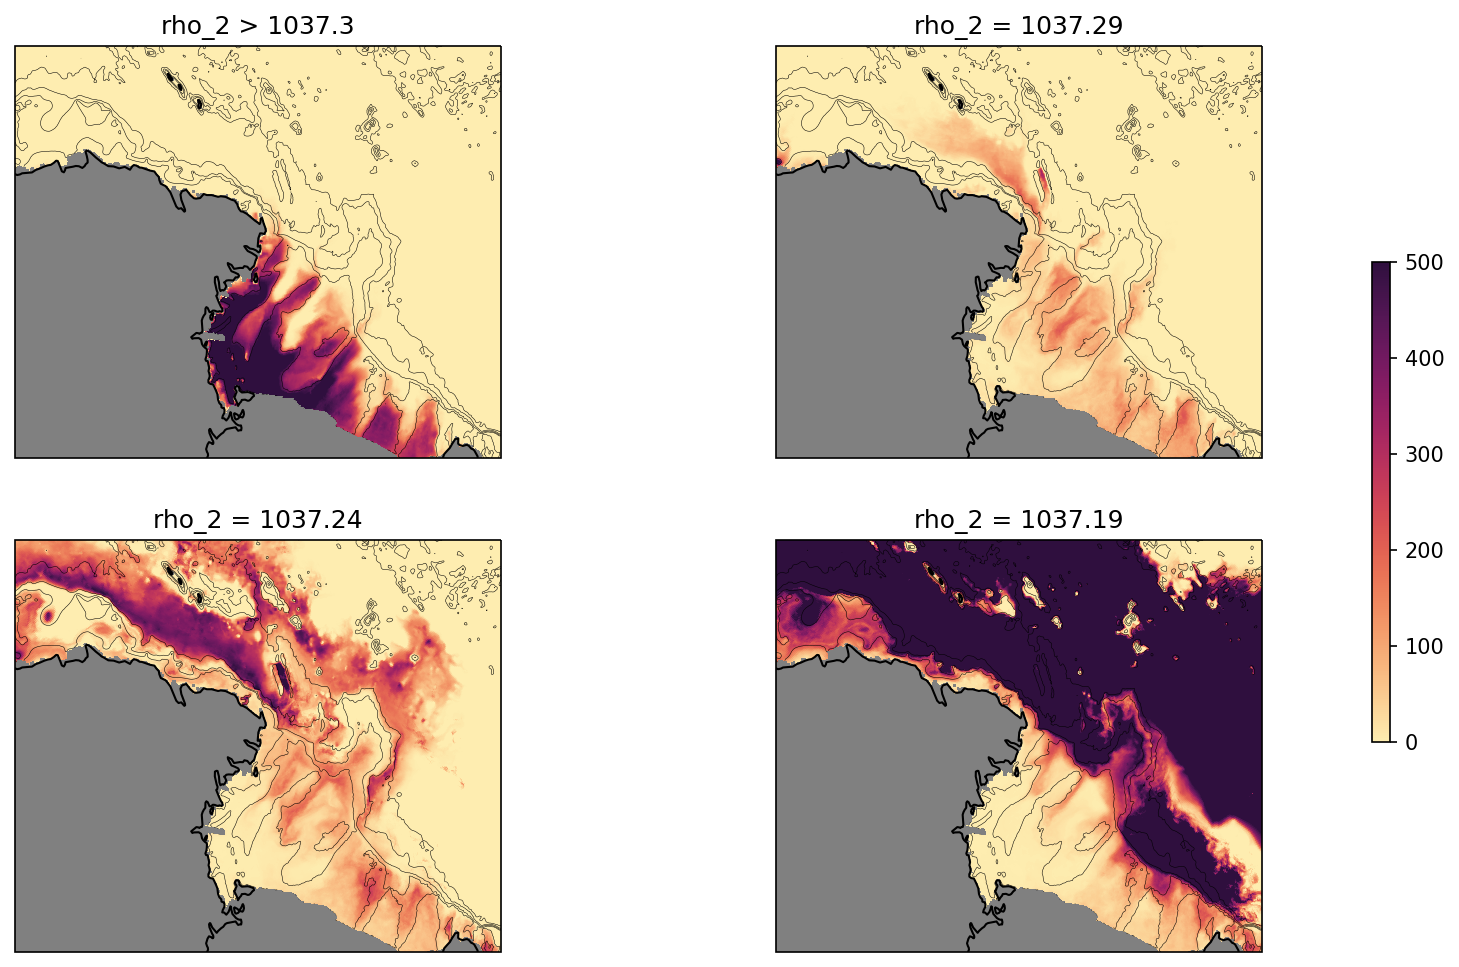

In [6]:
projection=ccrs.Stereographic(central_latitude=-72, central_longitude=-190)

fig = plt.figure(figsize=(12, 8), dpi=150)

ax = plt.subplot(2, 2, 1, projection=projection)
hh = hmo_h1.sel(rho2_l=slice(1037.3,1038)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0,vmax=500,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-210, -170, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 > 1037.3')

ax = plt.subplot(2, 2, 2, projection=projection)
ii=62
hh = hmo_h1.isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0,vmax=500,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-210, -170, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%hmo_h1.rho2_l[ii].values)

ax = plt.subplot(2, 2, 3, projection=projection)
ii=61
hh = hmo_h1.isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0,vmax=500,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-210, -170, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%hmo_h1.rho2_l[ii].values)


ax = plt.subplot(2, 2, 4, projection=projection)
ii=60
hh = hmo_h1.isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0,vmax=500,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-210, -170, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%hmo_h1.rho2_l[ii].values)


ax_c = plt.axes([0.92,0.3,0.01,0.4])
plt.colorbar(hh,ax_c)

#ax.set_boundary(circle, transform=ax.transAxes)
#plt.savefig('figures/Ross.png')

In [7]:
%%time
hmo_v3 = cc.querying.getvar('panant-v3','hmo', session,chunks={'xh':120}).sel(xh=slice(-230, -140)).isel(time=slice(24,36)).mean('time').load()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, 

CPU times: user 1min 10s, sys: 7.23 s, total: 1min 17s
Wall time: 6min 2s


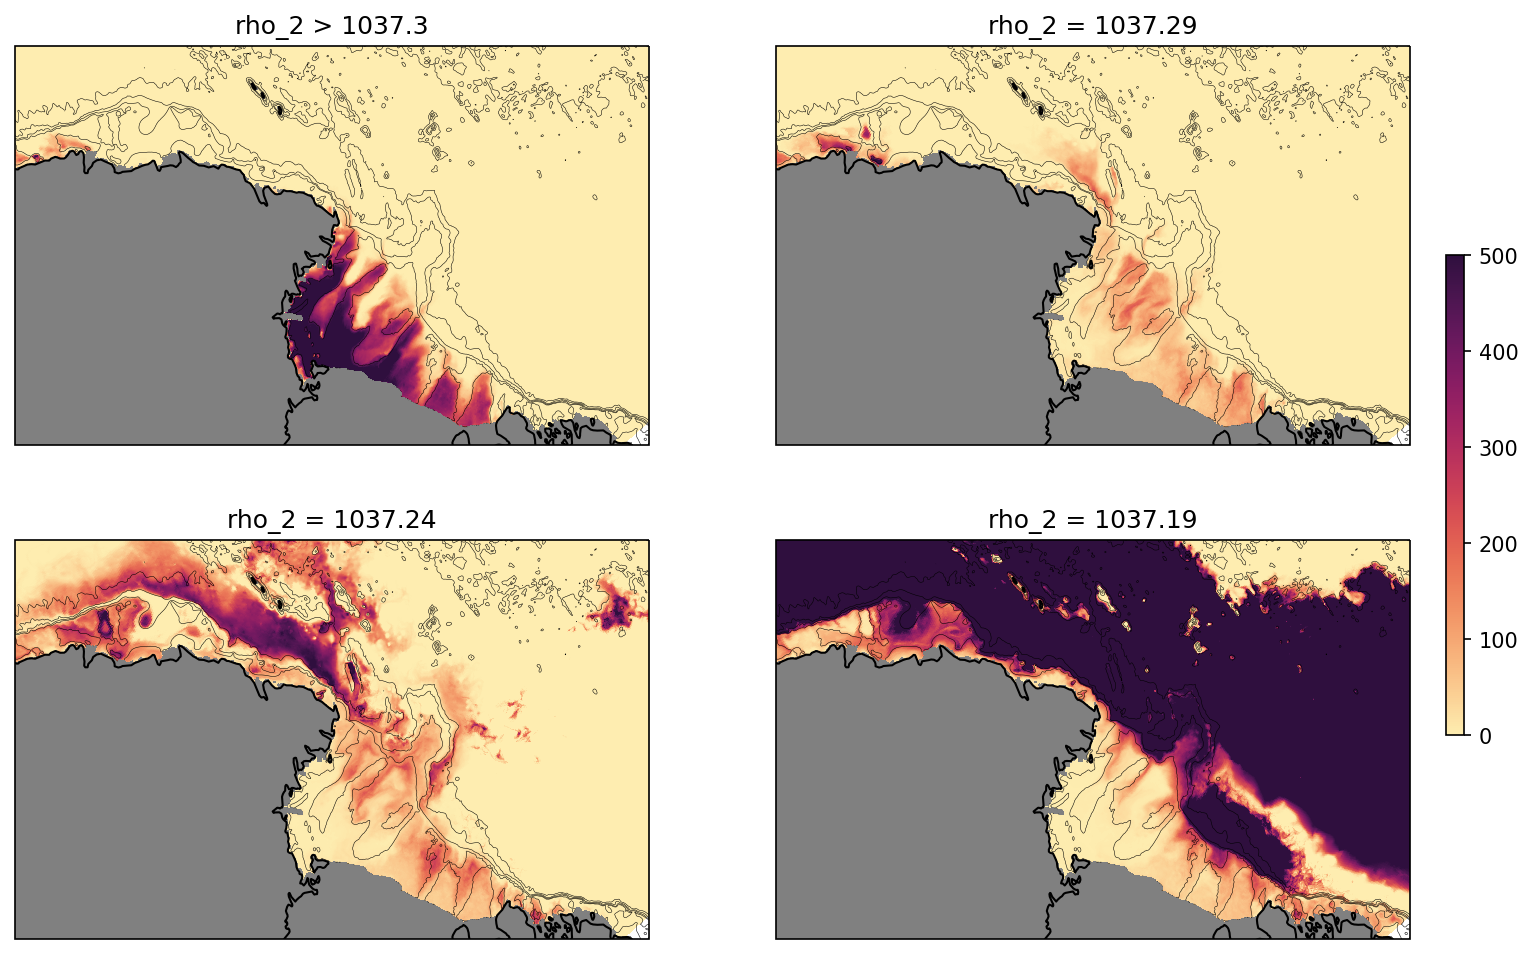

In [8]:
projection=ccrs.Stereographic(central_latitude=-72, central_longitude=-190)

fig = plt.figure(figsize=(12, 8), dpi=150)

ax = plt.subplot(2, 2, 1, projection=projection)
hh = hmo_v3.sel(rho2_l=slice(1037.3,1038)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0,vmax=500,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 > 1037.3')

ax = plt.subplot(2, 2, 2, projection=projection)
ii=62
hh = hmo_v3.isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0,vmax=500,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%hmo_v3.rho2_l[ii].values)

ax = plt.subplot(2, 2, 3, projection=projection)
ii=61
hh = hmo_v3.isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0,vmax=500,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%hmo_v3.rho2_l[ii].values)


ax = plt.subplot(2, 2, 4, projection=projection)
ii=60
hh = hmo_v3.isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0,vmax=500,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%hmo_v3.rho2_l[ii].values)


ax_c = plt.axes([0.92,0.3,0.01,0.4])
plt.colorbar(hh,ax_c)

In [9]:
hmo_diff = hmo_h1 - hmo_v3

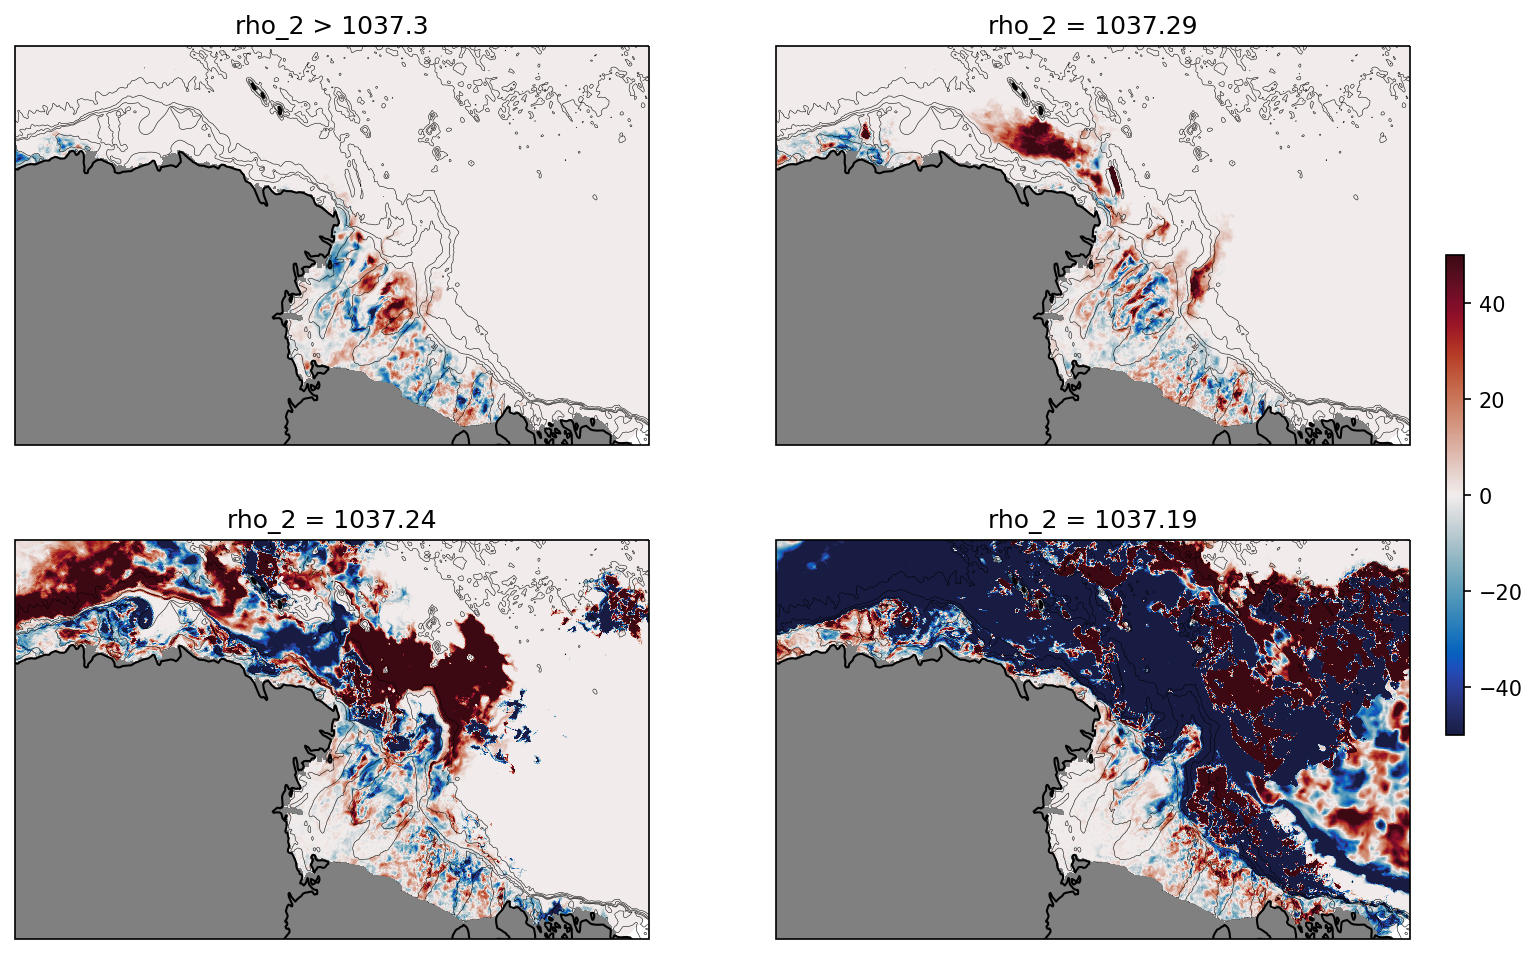

In [10]:
projection=ccrs.Stereographic(central_latitude=-72, central_longitude=-190)

fig = plt.figure(figsize=(12, 8), dpi=150)

ax = plt.subplot(2, 2, 1, projection=projection)
hh = hmo_diff.sel(rho2_l=slice(1037.3,1038)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-50,vmax=50,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 > 1037.3')

ax = plt.subplot(2, 2, 2, projection=projection)
ii=62
hh = hmo_diff.isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-50,vmax=50,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%hmo_diff.rho2_l[ii].values)

ax = plt.subplot(2, 2, 3, projection=projection)
ii=61
hh = hmo_diff.isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-50,vmax=50,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%hmo_diff.rho2_l[ii].values)


ax = plt.subplot(2, 2, 4, projection=projection)
ii=60
hh = hmo_diff.isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-50,vmax=50,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%hmo_diff.rho2_l[ii].values)


ax_c = plt.axes([0.92,0.3,0.01,0.4])
plt.colorbar(hh,ax_c)

## Look at transport magnitude

In [10]:
%%time
umo_v3 = cc.querying.getvar('panant-v3','umo', session,chunks={'xq':240}).sel(xq=slice(-230, -140)).isel(time=slice(24,36)).mean('time').load()
vmo_v3 = cc.querying.getvar('panant-v3','vmo', session,chunks={'xh':240}).sel(xh=slice(-230, -140)).isel(time=slice(24,36)).mean('time').load()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, 

CPU times: user 1min 44s, sys: 14.5 s, total: 1min 58s
Wall time: 13min 35s


In [13]:
ds = xr.merge([umo_v3, vmo_v3])
ds.coords['xh'].attrs.update(axis='X')
ds.coords['xq'].attrs.update(axis='X', c_grid_axis_shift=0.5)
ds.coords['yh'].attrs.update(axis='Y')
ds.coords['yq'].attrs.update(axis='Y', c_grid_axis_shift=0.5)
grid = Grid(ds, periodic=['X'])
u = grid.interp(ds.umo, 'X')
v = grid.interp(ds.vmo, 'Y', boundary='extend')
transport_v3 = ((u**2 + v**2)**(0.5)).load()

Exception during reset or similar
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/sqlalchemy/pool/base.py", line 697, in _finalize_fairy
    fairy._reset(pool)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/sqlalchemy/pool/base.py", line 893, in _reset
    pool._dialect.do_rollback(self)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/sqlalchemy/engine/default.py", line 558, in do_rollback
    dbapi_connection.rollback()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 23110814459712 and this is thread id 23108588717824.
Exception closing connection <sqlite3.Connection object at 0x1504620733f0>
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/sqlalchemy/pool/b

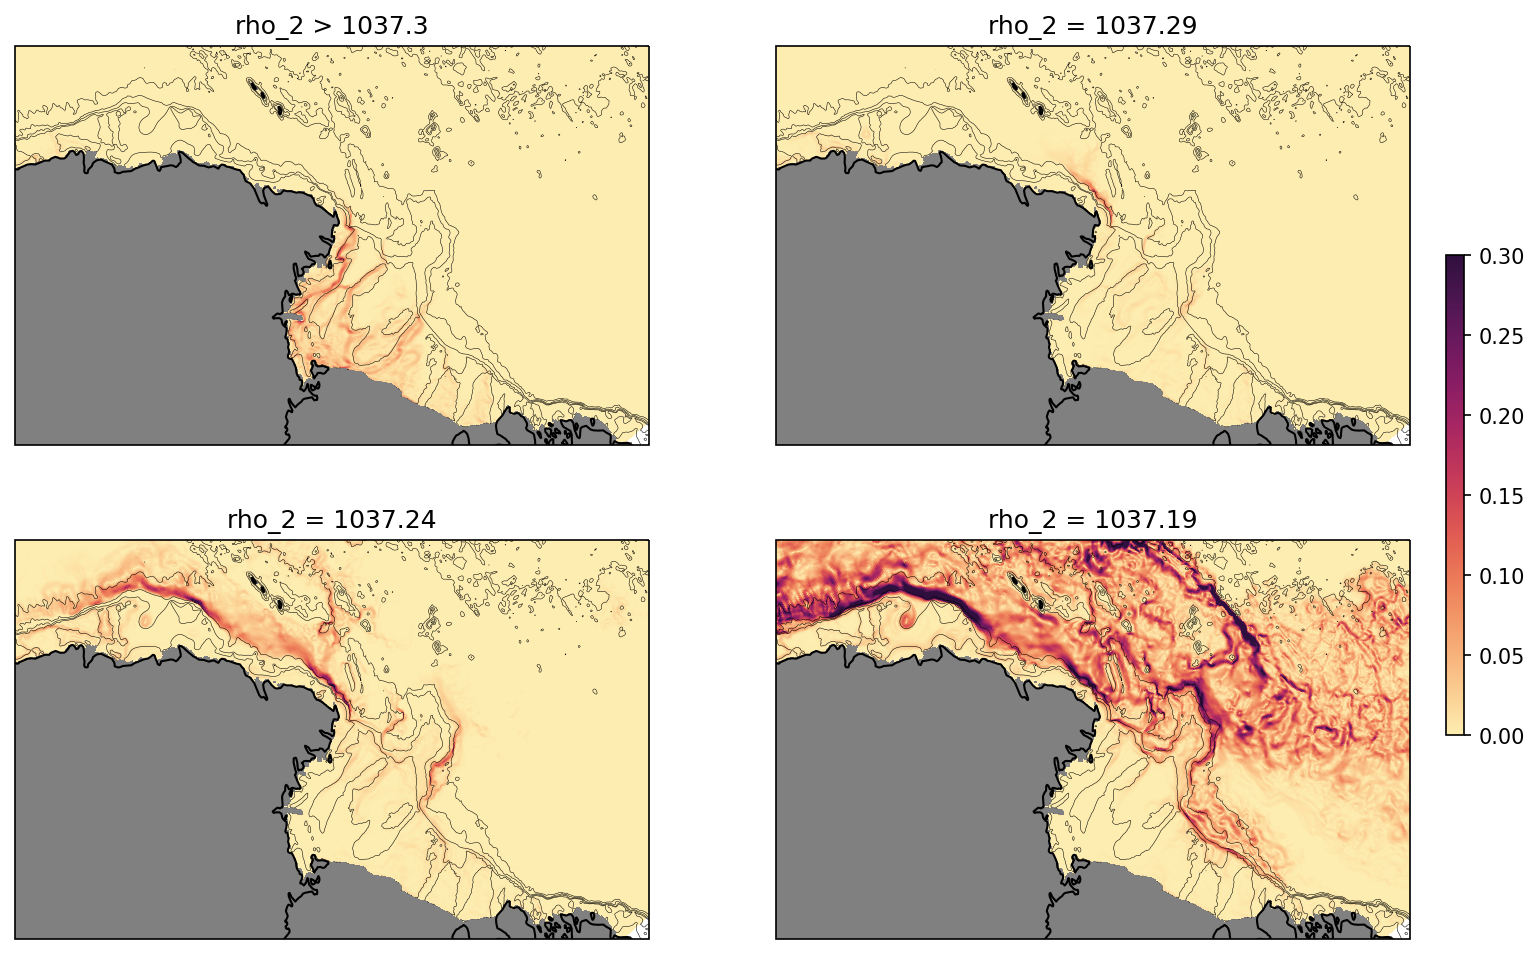

In [16]:
projection=ccrs.Stereographic(central_latitude=-72, central_longitude=-190)

fig = plt.figure(figsize=(12, 8), dpi=150)

ax = plt.subplot(2, 2, 1, projection=projection)
hh = (transport_v3/1e9).sel(rho2_l=slice(1037.3,1038)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0.0,vmax=0.3,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 > 1037.3')

ax = plt.subplot(2, 2, 2, projection=projection)
ii=62
hh = (transport_v3/1e9).isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0.0,vmax=0.3,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%transport_v3.rho2_l[ii].values)

ax = plt.subplot(2, 2, 3, projection=projection)
ii=61
hh = (transport_v3/1e9).isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0.0,vmax=0.3,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%transport_v3.rho2_l[ii].values)


ax = plt.subplot(2, 2, 4, projection=projection)
ii=60
hh = (transport_v3/1e9).isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0.0,vmax=0.3,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%transport_v3.rho2_l[ii].values)


ax_c = plt.axes([0.92,0.3,0.01,0.4])
plt.colorbar(hh,ax_c)

In [17]:
%%time
umo = cc.querying.getvar('panant-hycom1-v2','umo', session,chunks={'xq':240}).isel(time=slice(24,36)).mean('time').sel(xq=slice(-230, -140)).load()
vmo = cc.querying.getvar('panant-hycom1-v2','vmo', session,chunks={'xh':240}).isel(time=slice(24,36)).mean('time').sel(xh=slice(-230, -140)).load()
ds = xr.merge([umo, vmo])
ds.coords['xh'].attrs.update(axis='X')
ds.coords['xq'].attrs.update(axis='X', c_grid_axis_shift=0.5)
ds.coords['yh'].attrs.update(axis='Y')
ds.coords['yq'].attrs.update(axis='Y', c_grid_axis_shift=0.5)
grid = Grid(ds, periodic=['X'])
u = grid.interp(ds.umo, 'X')
v = grid.interp(ds.vmo, 'Y', boundary='extend')
transport_hycom1 = ((u**2 + v**2)**(0.5)).load()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, 

CPU times: user 1min 21s, sys: 13.5 s, total: 1min 35s
Wall time: 8min 18s


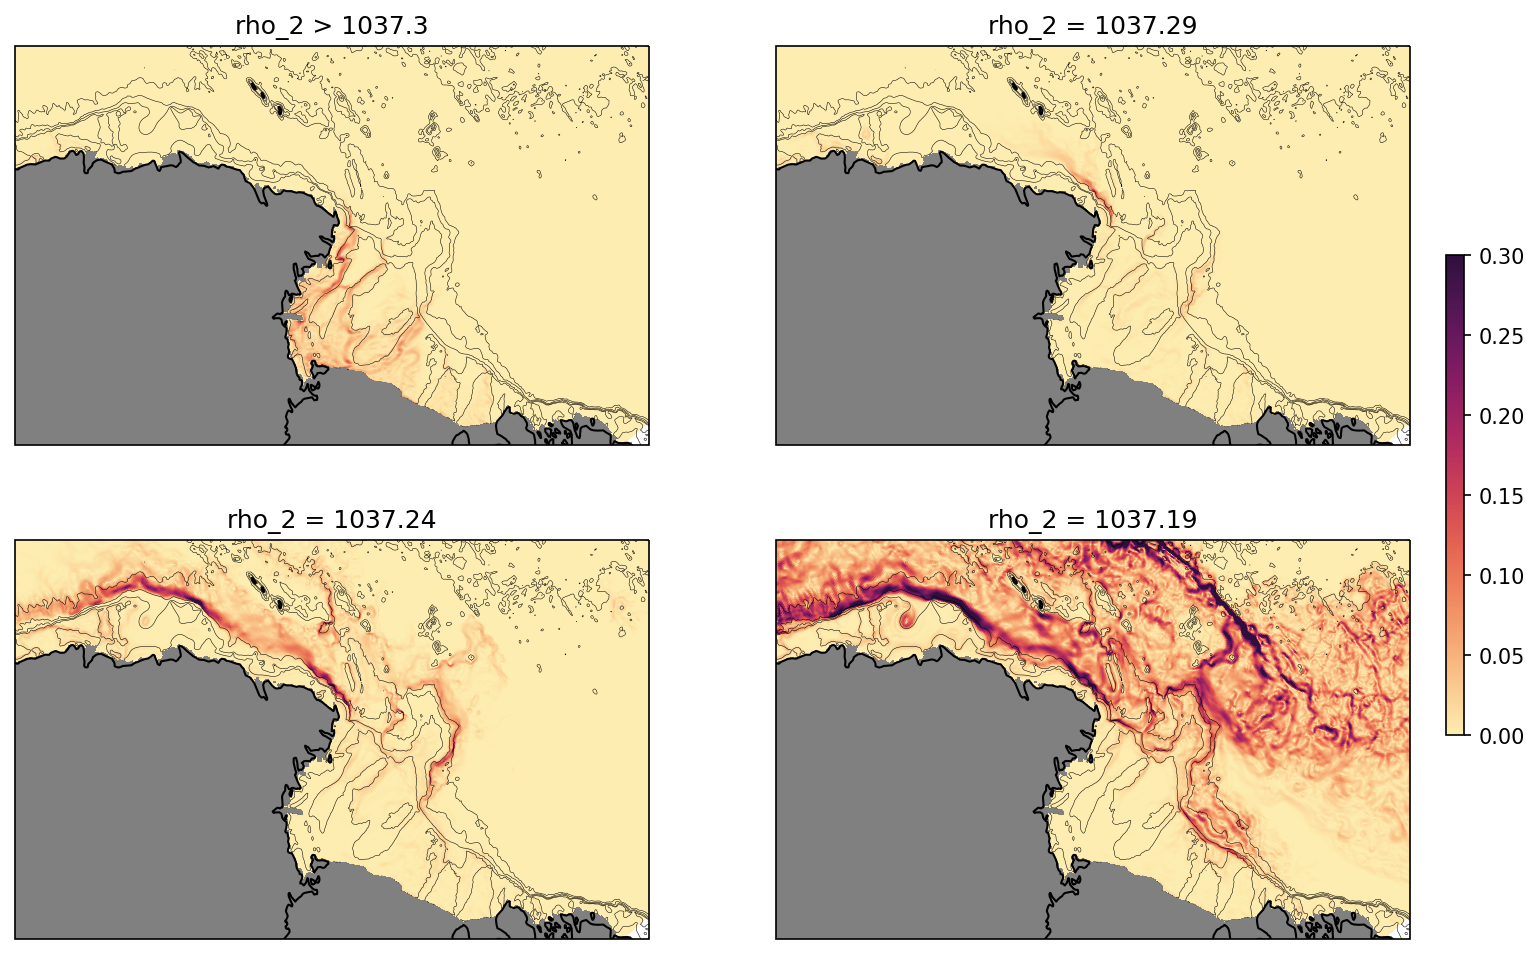

In [20]:
projection=ccrs.Stereographic(central_latitude=-72, central_longitude=-190)

fig = plt.figure(figsize=(12, 8), dpi=150)

ax = plt.subplot(2, 2, 1, projection=projection)
hh = (transport_hycom1/1e9).sel(rho2_l=slice(1037.3,1038)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0.0,vmax=0.3,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 > 1037.3')

ax = plt.subplot(2, 2, 2, projection=projection)
ii=62
hh = (transport_hycom1/1e9).isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0.0,vmax=0.3,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%transport_hycom1.rho2_l[ii].values)

ax = plt.subplot(2, 2, 3, projection=projection)
ii=61
hh = (transport_hycom1/1e9).isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0.0,vmax=0.3,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%transport_hycom1.rho2_l[ii].values)


ax = plt.subplot(2, 2, 4, projection=projection)
ii=60
hh = (transport_hycom1/1e9).isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0.0,vmax=0.3,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%transport_hycom1.rho2_l[ii].values)


ax_c = plt.axes([0.92,0.3,0.01,0.4])
plt.colorbar(hh,ax_c)

In [21]:
transport_diff = transport_hycom1 - transport_v3

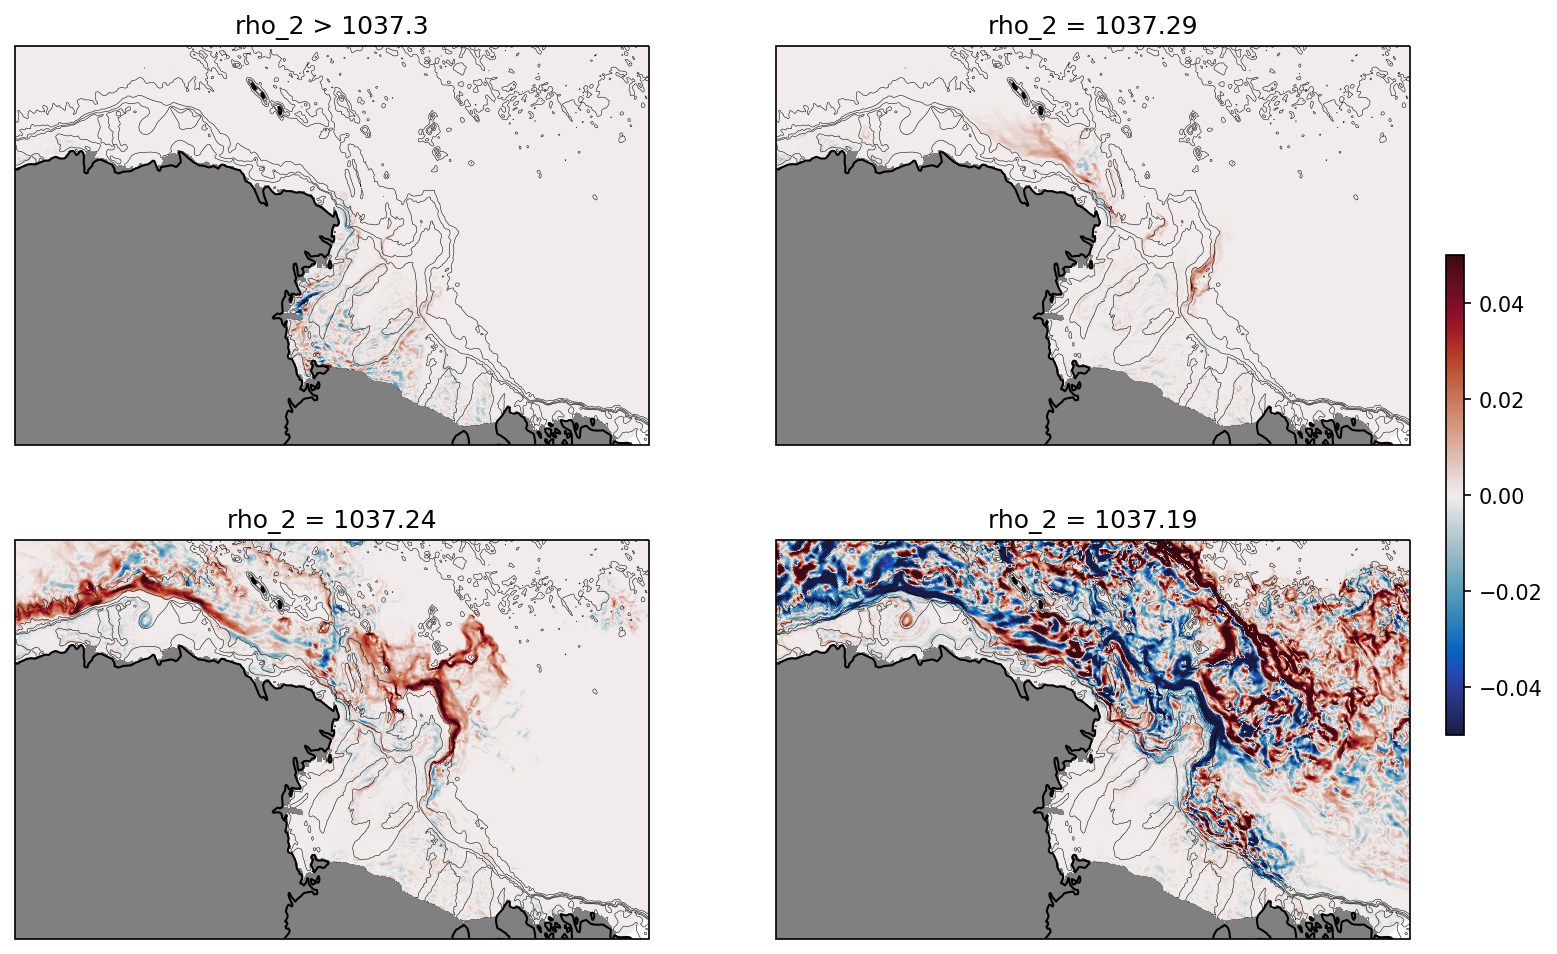

In [19]:
projection=ccrs.Stereographic(central_latitude=-72, central_longitude=-190)

fig = plt.figure(figsize=(12, 8), dpi=150)

ax = plt.subplot(2, 2, 1, projection=projection)
hh = (transport_diff/1e9).sel(rho2_l=slice(1037.3,1038)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-0.05,vmax=0.05,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 > 1037.3')

ax = plt.subplot(2, 2, 2, projection=projection)
ii=62
hh = (transport_diff/1e9).isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-0.05,vmax=0.05,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%transport_diff.rho2_l[ii].values)

ax = plt.subplot(2, 2, 3, projection=projection)
ii=61
hh = (transport_diff/1e9).isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-0.05,vmax=0.05,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%transport_diff.rho2_l[ii].values)


ax = plt.subplot(2, 2, 4, projection=projection)
ii=60
hh = (transport_diff/1e9).isel(rho2_l=(ii)).plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-0.05,vmax=0.05,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 = %6.2f'%transport_diff.rho2_l[ii].values)


ax_c = plt.axes([0.92,0.3,0.01,0.4])
plt.colorbar(hh,ax_c)

## Plotting surface speed, making movies, etc.

In [4]:
speed = cc.querying.getvar('panant-hycom1-v2','speed', session)

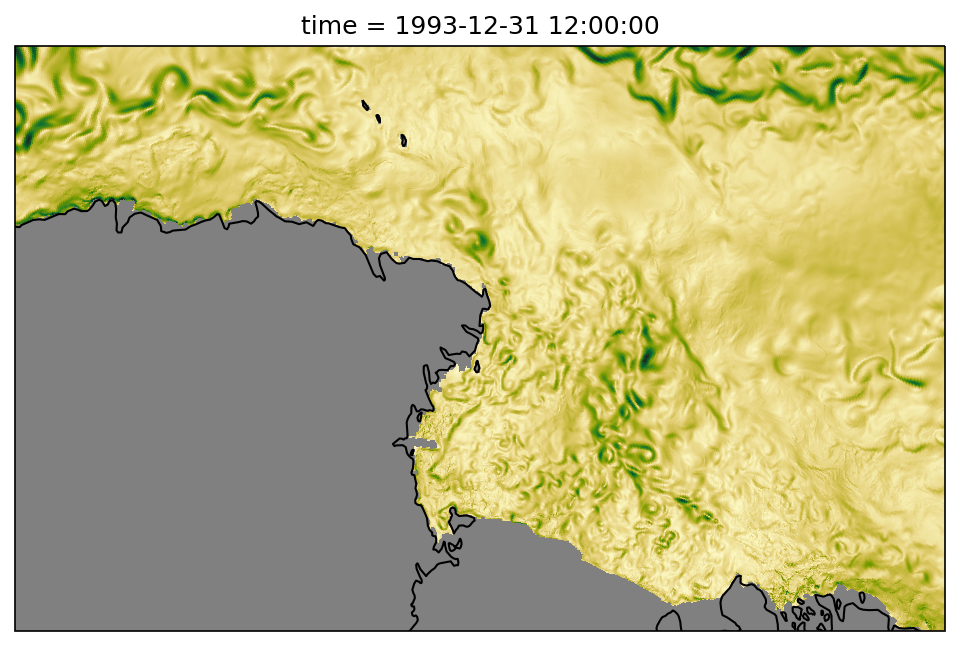

In [12]:
projection=ccrs.Stereographic(central_latitude=-72, central_longitude=-190)

fig = plt.figure(figsize=(8, 6), dpi=150)
ax = plt.subplot(1, 1, 1, projection=projection)
speed.isel(time=-1).plot(ax=ax,add_colorbar=False,vmin=0,vmax=0.6,
                     transform=ccrs.PlateCarree(),cmap=cm.cm.speed)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')

ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
#ax.set_boundary(circle, transform=ax.transAxes)
plt.savefig('figures/Ross.png')


In [ ]:
fig = plt.figure(figsize=(8, 6), dpi=150)
for ii in range(speed.time.size):
    
    speed_frame = speed.isel(time=ii)
    
    ax = plt.subplot(1, 1, 1, projection=projection)
    speed_frame.plot(add_colorbar=False,vmin=0,vmax=0.6,
                     transform=ccrs.PlateCarree(),cmap=cm.cm.speed)
    ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
    ax.coastlines(resolution='50m')
    ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())


    plt.title('')
    plt.tight_layout()
    
    filestr = '/g/data/x77/amh157/ross-frames/image%04d.png' % ii
    plt.savefig(filestr,dpi=150)
    plt.clf()
    if np.mod(ii,10)==0:
        print(ii)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
